# Data analysis on EDGAR Asset Backed Security(ABS) SEC Filings

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']


In [2]:
df = pd.read_csv(r'D:\data\edgar\edgar_abs_universal.csv')
df

,cik,company,loc,filing_id,filing_type,idx_url,filing_desc,effective,file_num,file_num_raw,file_idx,file_desc,doc_name,doc_link,doc_type,size
0,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,0.0,Complete submission text file,0000889697-97-000007.txt,/Archives/edgar/data/20164/0000889697-97-00000...,,162081.0
1,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,1.0,NaN,NaN,/Archives/edgar/data/20164/,10-Q,149247.0
2,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,2.0,NaN,NaN,/Archives/edgar/data/20164/,EX-12.A,2098.0
3,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,3.0,NaN,NaN,/Archives/edgar/data/20164/,EX-12.B,3564.0
4,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,4.0,NaN,NaN,/Archives/edgar/data/20164/,EX-15.A,1297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661097,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,1.0,FORM 8-K,d161492d8k.htm,/Archives/edgar/data/1383094/00011931252116673...,8-K,21760.0
1661098,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,2.0,EX-5.1,d161492dex51.htm,/Archives/edgar/data/1383094/00011931252116673...,EX-5.1,10606.0
1661099,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,3.0,EX-8.1,d161492dex81.htm,/Archives/edgar/data/1383094/00011931252116673...,EX-8.1,11941.0
1661100,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,4.0,GRAPHIC,g161492dsp4.jpg,/Archives/edgar/data/1383094/00011931252116673...,GRAPHIC,5204.0


In [10]:
df['year'] = df['effective'].apply(lambda effective: str(effective)[0:4])
df['year'].dropna(inplace=True)
df['year'] = df['year'].apply(lambda year: int(year))
df


,cik,company,loc,filing_id,filing_type,idx_url,filing_desc,effective,file_num,file_num_raw,file_idx,file_desc,doc_name,doc_link,doc_type,size,year
0,20164,CHRYSLER FINANCIAL CORP,MI,1.0,10-Q,/Archives/edgar/data/20164/0000889697-97-00000...,Quarterly report [Sections 13 or 15(d)]\nAcc-n...,1997-04-10,001-05966,001-05966\n97577605,0.0,Complete submission text file,0000889697-97-000007.txt,/Archives/edgar/data/20164/0000889697-97-00000...,,162081.0,1997
7,20164,CHRYSLER FINANCIAL CORP,MI,2.0,424B3,/Archives/edgar/data/20164/0000889697-97-00007...,Prospectus [Rule 424(b)(3)]\nAcc-no: 000088969...,1997-05-23,033-64179,033-64179\n97613420,0.0,Complete submission text file,0000889697-97-000071.txt,/Archives/edgar/data/20164/0000889697-97-00007...,,3726.0,1997
9,20164,CHRYSLER FINANCIAL CORP,MI,3.0,424B5,/Archives/edgar/data/20164/0000889697-97-00008...,Prospectus [Rule 424(b)(5)]\nAcc-no: 000088969...,1997-06-10,033-64179,033-64179\n97621290,0.0,Complete submission text file,0000889697-97-000087.txt,/Archives/edgar/data/20164/0000889697-97-00008...,,220583.0,1997
11,20164,CHRYSLER FINANCIAL CORP,MI,4.0,424B3,/Archives/edgar/data/20164/0000889697-97-00009...,Prospectus [Rule 424(b)(3)]\nAcc-no: 000088969...,1997-06-16,033-64179,033-64179\n97624505,0.0,Complete submission text file,0000889697-97-000091.txt,/Archives/edgar/data/20164/0000889697-97-00009...,,3572.0,1997
13,20164,CHRYSLER FINANCIAL CORP,MI,5.0,424B3,/Archives/edgar/data/20164/0000889697-97-00009...,Prospectus [Rule 424(b)(3)]\nAcc-no: 000088969...,1997-06-16,033-64179,033-64179\n97624506,0.0,Complete submission text file,0000889697-97-000092.txt,/Archives/edgar/data/20164/0000889697-97-00009...,,3573.0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661097,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,1.0,FORM 8-K,d161492d8k.htm,/Archives/edgar/data/1383094/00011931252116673...,8-K,21760.0,2021
1661098,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,2.0,EX-5.1,d161492dex51.htm,/Archives/edgar/data/1383094/00011931252116673...,EX-5.1,10606.0,2021
1661099,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,3.0,EX-8.1,d161492dex81.htm,/Archives/edgar/data/1383094/00011931252116673...,EX-8.1,11941.0,2021
1661100,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,4.0,GRAPHIC,g161492dsp4.jpg,/Archives/edgar/data/1383094/00011931252116673...,GRAPHIC,5204.0,2021


In [14]:
recentDf = df[df['year'] > 2014]
recentDf = recentDf[recentDf['doc_type'] != 'GRAPHIC']
recentDf = recentDf[recentDf['file_desc'] != 'Complete submission text file']
recentDf

,cik,company,loc,filing_id,filing_type,idx_url,filing_desc,effective,file_num,file_num_raw,file_idx,file_desc,doc_name,doc_link,doc_type,size,year
3777,20947,CLEVELAND ELECTRIC ILLUMINATING CO,OH,977.0,10-D,/Archives/edgar/data/20947/000157844315000004/...,Asset-Backed Issuer Distribution Report [Secti...,2015-01-30,001-02323,001-02323\n15563913,1.0,10-D,a10-d013015.htm,/Archives/edgar/data/20947/000157844315000004/...,10-D,115724.0,2015
3778,20947,CLEVELAND ELECTRIC ILLUMINATING CO,OH,977.0,10-D,/Archives/edgar/data/20947/000157844315000004/...,Asset-Backed Issuer Distribution Report [Secti...,2015-01-30,001-02323,001-02323\n15563913,2.0,EXHIBIT 99.1,exhibit99_1-pirbtrust.htm,/Archives/edgar/data/20947/000157844315000004/...,EX-99.1,142807.0,2015
3779,20947,CLEVELAND ELECTRIC ILLUMINATING CO,OH,977.0,10-D,/Archives/edgar/data/20947/000157844315000004/...,Asset-Backed Issuer Distribution Report [Secti...,2015-01-30,001-02323,001-02323\n15563913,3.0,EXHIBIT 99.2,exhibit99_2-ceifunding.htm,/Archives/edgar/data/20947/000157844315000004/...,EX-99.2,395384.0,2015
3780,20947,CLEVELAND ELECTRIC ILLUMINATING CO,OH,977.0,10-D,/Archives/edgar/data/20947/000157844315000004/...,Asset-Backed Issuer Distribution Report [Secti...,2015-01-30,001-02323,001-02323\n15563913,4.0,EXHIBIT 99.3,exhibit99_3-oefunding.htm,/Archives/edgar/data/20947/000157844315000004/...,EX-99.3,262591.0,2015
3781,20947,CLEVELAND ELECTRIC ILLUMINATING CO,OH,977.0,10-D,/Archives/edgar/data/20947/000157844315000004/...,Asset-Backed Issuer Distribution Report [Secti...,2015-01-30,001-02323,001-02323\n15563913,5.0,EXHIBIT 99.4,exhibit99_4-tefunding.htm,/Archives/edgar/data/20947/000157844315000004/...,EX-99.4,307000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661031,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370132.0,8-K,/Archives/edgar/data/1859055/00011931252116671...,"Current report, items 1.01, 8.01, and 9.01\n\n...",2021-05-19,333-228364-15,333-228364-15\n21941062,9.0,EX-36.1,d167790dex361.htm,/Archives/edgar/data/1383094/00011931252116671...,EX-36.1,5467.0,2021
1661034,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370133.0,424B5,/Archives/edgar/data/1859055/00011931252116672...,Prospectus [Rule 424(b)(5)]\nAcc-no: 000119312...,2021-05-19,333-228364-15,333-228364-15\n21941174,1.0,FORM 424(B)(5),d129271d424b5.htm,/Archives/edgar/data/1383094/00011931252116672...,424B5,3347688.0,2021
1661097,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,1.0,FORM 8-K,d161492d8k.htm,/Archives/edgar/data/1383094/00011931252116673...,8-K,21760.0,2021
1661098,1859055,Santander Drive Auto Receivables Trust 2021-2,TX,370134.0,8-K,/Archives/edgar/data/1859055/00011931252116673...,"Current report, items 8.01 and 9.01\n\nAcc-no:...",2021-05-19,333-228364-15,333-228364-15\n21941241,2.0,EX-5.1,d161492dex51.htm,/Archives/edgar/data/1383094/00011931252116673...,EX-5.1,10606.0,2021


In [16]:
recentDf.to_csv(r'D:\data\edgar\edgar_abs_since_2015.csv',index=False)

In [22]:
# SPV 层面分析
spv_df = df[['cik','company','loc']]
spv_df = spv_df.drop_duplicates()
spv_df.set_index('cik', inplace=True)
def get_company_category(company):
    company = company.lower()
    if 'student' in company or 'educat' in company:
        return 'ABS - Student Loan'
    if 'card' in company:
        return 'ABS - CARD'
    if 'auto' in company or 'vehicle' in company or 'moto' in company or 'toyota' in company:
        return 'ABS - AUTO'

    if 'mbs' in company:
        return 'MBS'
    if 'home' in company:
        return 'MBS'
    if 'mor' in company:
        return 'MBS'
    if  '-bnk' in company:
        return 'MBS'
    if 'hous' in company:
        return 'MBS'
    if 'receiv' in company or 'asset' in company:
        return 'ABS - Others'
    return 'OTHER'

spv_df['company_category'] = spv_df['company'].apply(get_company_category)
# other_df = spv_df[spv_df['company_category'] == 'OTHER']
# print(list(other_df['company']))
spv_group_by_type_df = spv_df.groupby(['company_category']).count()
spv_group_by_type_df.drop('loc', axis=1, inplace=True)
spv_group_by_type_df.columns = ['Count']
spv_group_by_type_df


['CHRYSLER FINANCIAL CORP', 'CLEVELAND ELECTRIC ILLUMINATING CO', 'FIRST NATIONAL BANK OF ATLANTA', 'OHIO EDISON CO', 'SIGNET BANK /VA/', 'BNY MELLON N.A.', 'CALIFORNIA FEDERAL BANK FSB', 'PROVIDENT BANK', 'CM CORP', 'HSBC BANK USA', "Company Name Three `!#$(),:;=.-;\\|@/{}&'\\WA\\", 'TOLEDO EDISON CO', 'BANK OF AMERICA NATIONAL TRUST & SAVING ASSOCIATION', 'LEHMAN CMO INC', 'TRITON CONTAINER INTERNATIONAL LTD', 'SALOMON CAPITAL ACCESS CORP', 'TECHNOLOGY FUNDING SECURED INVESTORS II', 'TECHNOLOGY FUNDING SECURED INVESTORS I', 'FSF FINANCE CORP', 'SUMMIT TAX EXEMPT BOND FUND LP', 'KRUPP INSURED PLUS LTD PARTNERSHIP', 'CAPITAL SENIOR LIVING COMMUNITIES L P', 'RESIDENTIAL RESOURCES INC', 'SUMMIT TAX EXEMPT L P II', 'CMC SECURITIES CORP I', 'INVG GOVERNMENT SECURITIES CORP', 'GNLV CORP', 'JHM ACCEPTANCE CORP III', 'NORTH SIDE CAPITAL CORP', 'KRUPP INSURED PLUS II LTD PARTNERSHIP', 'WFS REPUBLIC INC', 'SCA TAX EXEMPT FUND LIMITED PARTNERSHIP', 'BEAR STEARNS SECURED INVESTORS INC', 'SUMMIT T

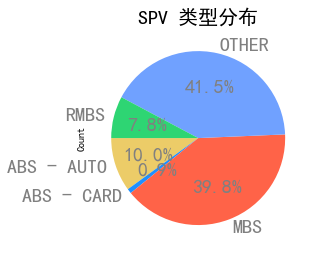

In [5]:
# products = spv_group_by_type_df['category']
counts = spv_group_by_type_df['Count']
colors = ['#eccc68','#1e90ff','#ff6348','#70a1ff','#2ed573']
fig = counts.plot(kind='pie',         # 图形类型
            title = 'SPV 类型分布',
            fontsize = 20,
            autopct='%.1f%%',   # 数值标签
            colors = colors,
            radius = 1,         # 饼图半径
            startangle = 180,   # 初始角度
            textprops= {'fontsize':14,'color':'0.5'}
)
fig.axes.title.set_size('20')
# plt.title('SPV 类型分布')
plt.show()

In [6]:
# SPV 公司Filing 文件分析
spv_filing_df = df[['cik','company','filing_id','filing_type','idx_url','filing_desc','effective','file_num']]
spv_filing_df.drop_duplicates(inplace=True)
spv_filing_count_df = spv_filing_df.groupby(['company']).count()
spv_filing_count_df = spv_filing_count_df['cik']
# spv_filing_count_df.columns = ['Count']
spv_filing_count_df.sort_values(ascending=False).head(10)

<ipython-input-6-922aabe047df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spv_filing_df.drop_duplicates(inplace=True)


company
AMERICREDIT FINANCIAL SERVICES INC                2040
Morgan Stanley Finance LLC                        2040
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION         2040
CWMBS INC                                         2040
Ally Auto Assets LLC                              2022
SANTANDER DRIVE AUTO RECEIVABLES LLC              1989
AFS SENSUB CORP.                                  1986
STRUCTURED ASSET SECURITIES CORP                  1911
HYUNDAI ABS FUNDING LLC                           1850
WELLS FARGO COMMERCIAL MORTGAGE SECURITIES INC    1776
Name: cik, dtype: int64

<AxesSubplot:xlabel='category'>

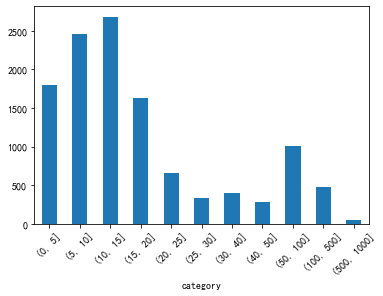

In [7]:
# SPV Filing 数量分布
filing_cnt_df = spv_filing_df.groupby(['company']).count()
filing_bins = [0,5,10,15,20,25,30,40,50,100,500,1000]
filing_cnt_df['category'] = pd.cut(filing_cnt_df['cik'], filing_bins)
by_filing_count = filing_cnt_df.groupby('category').count()
by_filing_count['cik'].plot.bar(rot=45)

<ipython-input-8-2df5f016ba35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spv_filing_df['filing_year'] = spv_filing_df['effective'].apply(lambda effective: str(effective)[0:4])


<AxesSubplot:xlabel='filing_year'>

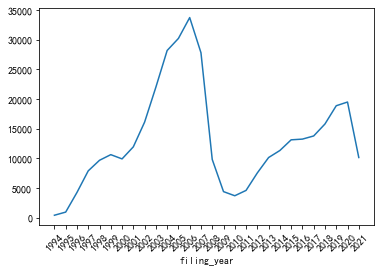

In [8]:
# SPV 公司Filing 时间分析
spv_filing_df['filing_year'] = spv_filing_df['effective'].apply(lambda effective: str(effective)[0:4])
by_year_count = spv_filing_df.groupby('filing_year').count()
by_year_count.drop(['nan'],inplace=True)
by_year_count.index = by_year_count.index.astype('int64')
by_year_count['cik'].plot(kind= 'line',xticks = by_year_count.index, rot=45)


<AxesSubplot:ylabel='count'>

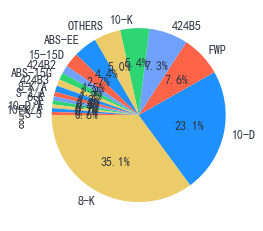

In [9]:
by_type = spv_filing_df.groupby('filing_type').count()
by_type.reset_index(inplace=True)
by_type['category'] = by_type.apply(lambda row: 'OTHERS' if row['cik'] < 2000 else row['filing_type'], axis=1)
by_type = by_type.groupby('category').sum()
file_type_cnt = by_type['cik']
file_type_cnt.name = 'count'
file_type_cnt = file_type_cnt.sort_values(ascending=False)
file_type_cnt.plot(kind='pie',
                   autopct='%.1f%%',   # 数值标签
                   colors = colors,
                   # radius = 2,         # 饼图半径
                   startangle = 180,   # 初始角度
                   textprops= {'fontsize':12,'color':'#2f3542'}
)

In [10]:
# Filing Files 分析
spv_files = df[['cik','company','effective','filing_id','filing_type','file_idx']]
spv_files_df = spv_files.groupby(['cik','company','filing_id','effective','filing_type']).count().reset_index()
spv_files_df.sort_values('file_idx', ascending=False).head(10)

,cik,company,filing_id,effective,filing_type,file_idx
257531,1396127,Wachovia Bank Commercial Mortgage Trust Series...,257532.0,2007-06-15,8-K,440
201491,1321406,IndyMac Indx Mortgage Loan Trust 2005-AR6,201492.0,2008-03-27,424B3,420
100045,1090295,INDYMAC MBS INC,100046.0,2008-03-27,424B3,420
100044,1090295,INDYMAC MBS INC,100045.0,2008-03-27,424B3,354
213851,1338269,INDYMAC INDX MORTGAGE LOAN TRUST 2005-AR18,213852.0,2008-03-27,424B3,354
70635,1013109,BA MASTER CREDIT CARD TRUST /,70636.0,2002-08-21,8-K/A,326
237482,1369387,Thornburg Mortgage Securities Trust 2006-4,237483.0,2006-08-28,8-K,284
288422,1549785,Macquarie Leasing Pty Ltd,288423.0,2012-12-18,8-K,244
332729,1669393,Citigroup Commercial Mortgage Trust 2016-P3,332730.0,2021-03-30,10-K,212
242766,1377618,IndyMac INDA Mortgage Loan Trust 2006-AR3,242767.0,2008-03-27,424B3,208


<AxesSubplot:xlabel='cate'>

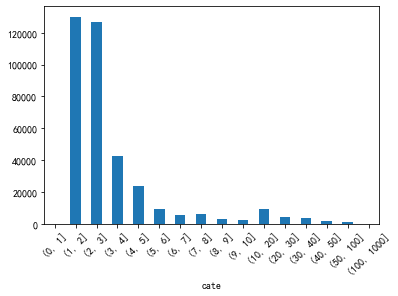

In [12]:
# Filing File 数量分布
files_cnt_bins = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,1000]
spv_files_df['cate'] = pd.cut(spv_files_df['file_idx'], files_cnt_bins)
by_spv_files_count = spv_files_df.groupby('cate').count()
by_spv_files_count['cik'].plot.bar(rot=45)

In [4]:
import pandas as pd
df = pd.DataFrame([10,20,30,40], columns=['nums'],index=['a','b','c','d'])
df

,nums
a,10
b,20
c,30
d,40


In [5]:
df.index = ['a','b','b','d']

In [6]:
df

,nums
a,10
b,20
b,30
d,40


In [9]:
df.loc['b']

,nums
b,20
b,30


In [10]:
df['nums']

a    10
b    20
b    30
d    40
Name: nums, dtype: int64